# 1. Week 4 assignment

The dataset chosen is Gapminder. You can check the codebook [clicking here](https://github.com/srodriguex/coursera_data_management_and_visualization/raw/master/data/GapMinder%20Codebook%20.pdf).

We chose  `incomeperperson` as the response variable and `relectricperperson`, `employrate`, and `urbanrate` as the explanatory variables.

To use this program you must have [Python](http://www.python.org) 3.3+ and [IPython Notebook](http://ipython.org) 1.0+ installed.

In [1]:
%pylab inline

# This package is very useful to data analysis in Python.
import pandas as pd

# This package makes nice looking graphics.
import seaborn as sn

# Read the csv file to a dataframe object.
df = pd.read_csv('data/gapminder.csv')

# Convert all number values to float.
df = df.convert_objects(convert_numeric=True)

# Define the Country as the unique id of the dataframe.
df.index = df.country
del df['country']

# List of the variables selected.
vars_sel = ['incomeperperson', 'relectricperperson', 'employrate', 
            'urbanrate']


# Dataframe with only the variables selected.
df = df[vars_sel]





Populating the interactive namespace from numpy and matplotlib


C:\Anaconda2\envs\deep3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
C:\Anaconda2\envs\deep3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [2]:
new_size = array((6,4))*1.3
figsize(*new_size)
sn.set(color_codes=True)

## 1.1 Univariate graphs

In this section we plot histograms to see the distribuition of the values for the variables chosen and plot the mean and median values to ease the understanding of the distribution.

In [3]:
# Helper function to plots a histogram for the variable given.
def plot_hist(var_name):
    g = sn.distplot(df[var_name].dropna(), kde=False, rug=True, label=var_name);
    g.set_title('Variable {}'.format(var_name), weight='bold', size=13);
    axvline(df[var_name].mean(), label='Mean')
    axvline(df[var_name].median(), label='Median', color='r')
    legend(loc='best');

### 1.1.1 Variable incomeperperson

The histogram shows a deep concentratation, clearly half of the world in the first bin, with low income per capita.

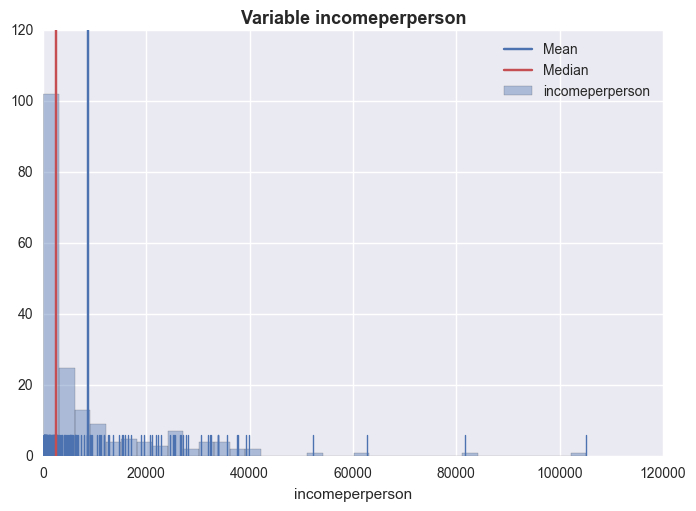

In [4]:
plot_hist('incomeperperson')

### 1.1.2 Variable relectricperperson

Another concentration of electric consumption in the low bins, but this is not surprising as the most developed countries are not great in numbers, mostly in Europe with United States, Canada, e some others exceptions.

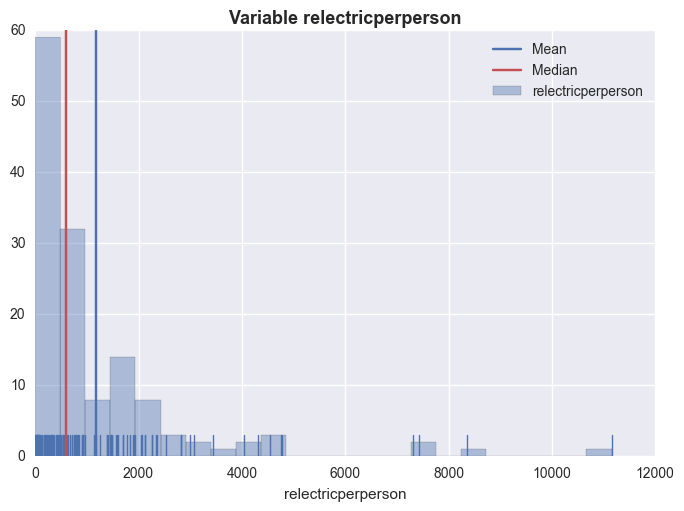

In [5]:
plot_hist('relectricperperson')

### 1.1.3 Variable employrate

This variable is the only one who follows a Gaussian distribution, where the mean and median are almost the same. The average of the world in nearly 60% of employ rate, with slightly more countries in the upper extreme than the lower.

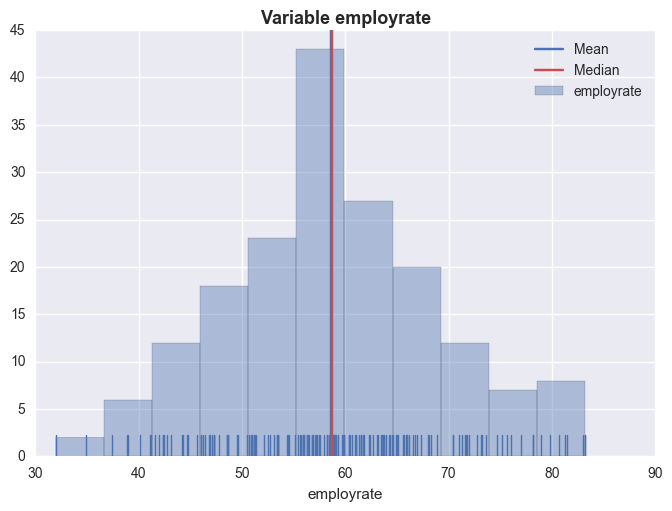

In [6]:
plot_hist('employrate')

### 1.1.4 Variable urbanrate

An distribution slightly Gaussian than Uniform.

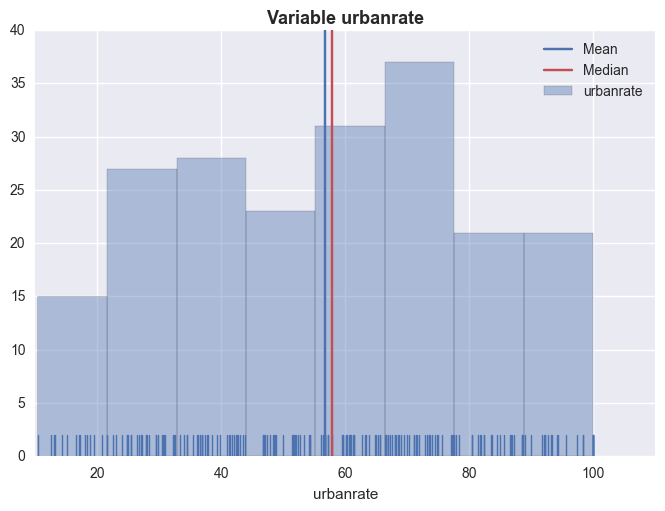

In [7]:
plot_hist('urbanrate')

## 1.2 Bivariate graphs

For this task I've chosen the `incomeperperson` as the response variable and the others as explanatory variable. Please, ignore the red Warning messages, it's not an error, just an alert.

### 1.2.1 Income per person vs Electric per person

The graph below clearly shows that the incompe per person follows electrict consumption, although a good number of observations are clustered in the lower left of the graph.

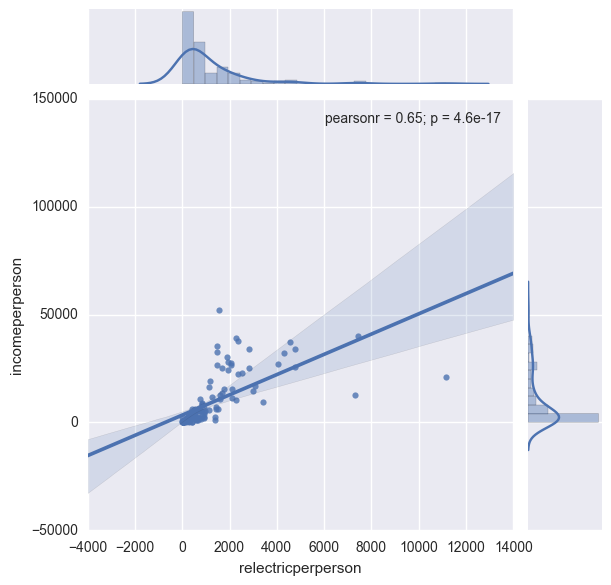

In [8]:
sn.jointplot(y=df.incomeperperson, x=df.relectricperperson, kind='reg');

Here we filter the data to the region clustered to see in more details the relationship. It also shows that the income per peson rise as the eletric consumption rise, in general. There are a few observations that with electric consumption near 1400 not followed by an increase in income. This may be the cause of some countries with electric power subsidized by the state.

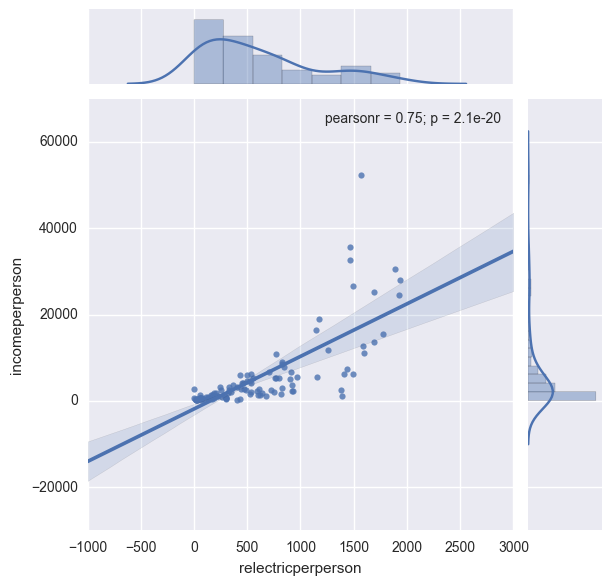

In [9]:
zoom = (df.relectricperperson>-100) & (df.relectricperperson < 2000);
y_zoom = df.incomeperperson[zoom];
x_zoom = df.relectricperperson[zoom];
sn.jointplot(y=y_zoom, x=x_zoom, kind='reg');

### 1.2.2 Income per person vs Employ rate

Here we can there isn't a correlation between Income and Employ rates. Countries with high employ rate but low income per capita may be a sign of labor with low aggregated value as agriculture, or huge concentration of income leading to social inequality.

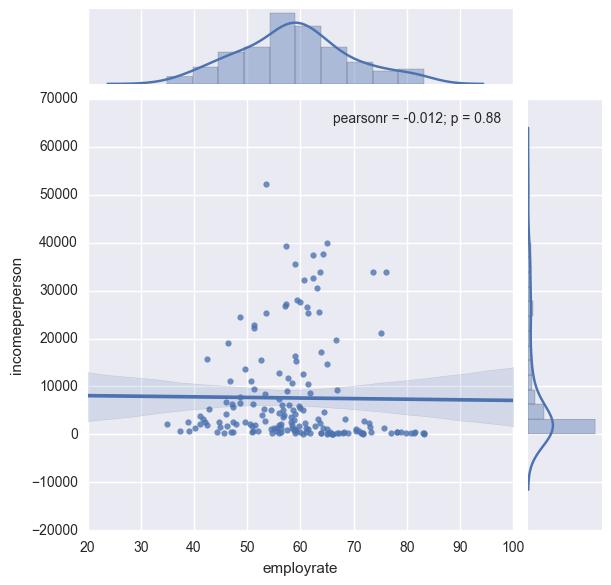

In [10]:
sn.jointplot(y=df.incomeperperson, x=df.employrate, kind='reg');

### 1.2.3 Income per person vs Urban rate

For this last graph, it shows the more people live in urban areas, the more income per capita rises, there are a concentration of low income throughout the urban rate, though.

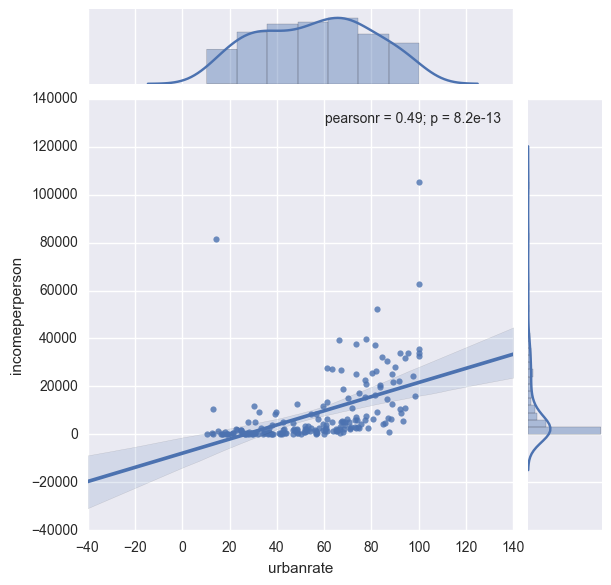

In [11]:
sn.jointplot(y=df.incomeperperson, x=df.urbanrate, kind='reg');

End of assignment.